In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
csv_path = Path("../Data/mxmh_survey_results (1).csv")
survey_df = pd.read_csv(csv_path)
survey_df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [3]:
survey_df = survey_df.fillna({"BPM": ''})
cleaned_survey_df = survey_df.dropna(how = 'any')
cleaned_survey_df.count()

Timestamp                       718
Age                             718
Primary streaming service       718
Hours per day                   718
While working                   718
Instrumentalist                 718
Composer                        718
Fav genre                       718
Exploratory                     718
Foreign languages               718
BPM                             718
Frequency [Classical]           718
Frequency [Country]             718
Frequency [EDM]                 718
Frequency [Folk]                718
Frequency [Gospel]              718
Frequency [Hip hop]             718
Frequency [Jazz]                718
Frequency [K pop]               718
Frequency [Latin]               718
Frequency [Lofi]                718
Frequency [Metal]               718
Frequency [Pop]                 718
Frequency [R&B]                 718
Frequency [Rap]                 718
Frequency [Rock]                718
Frequency [Video game music]    718
Anxiety                     

In [4]:
# 
cleaned_survey_df.columns 

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [5]:
cleaned_survey_df["Anxiety"].value_counts()

Anxiety
7.0     119
8.0     113
6.0      83
10.0     65
3.0      65
5.0      59
4.0      54
9.0      53
2.0      44
0.0      34
1.0      28
7.5       1
Name: count, dtype: int64

In [6]:
cleaned_survey_df["Music effects"].value_counts()

Music effects
Improve      535
No effect    166
Worsen        17
Name: count, dtype: int64

In [7]:
# assign a value on effect 
mapping = {"Improve": +1, "No effect": 0, "Worsen": -1}
cleaned_survey_df["Music effects value"] = cleaned_survey_df["Music effects"].map(mapping)


/var/folders/1p/3xs_bs4d0fv45v81b3hfdwlh0000gn/T/ipykernel_85699/522149994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_df["Music effects value"] = cleaned_survey_df["Music effects"].map(mapping)


In [8]:
cleaned_survey_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Music effects value
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,1
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,1
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.,1
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.,1


In [9]:
grouped_counts = cleaned_survey_df.groupby(['Anxiety', 'Music effects']).size().reset_index(name='count')
grouped_counts.head()

,Anxiety,Music effects,count
0,0.0,Improve,19
1,0.0,No effect,15
2,1.0,Improve,17
3,1.0,No effect,11
4,2.0,Improve,29


In [10]:
pivot_table = grouped_counts.pivot_table(
    index='Anxiety',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
Anxiety                                  
0.0               19.0       15.0     0.0
1.0               17.0       11.0     0.0
2.0               29.0       14.0     1.0
3.0               42.0       21.0     2.0
4.0               42.0       11.0     1.0
5.0               44.0       14.0     1.0
6.0               66.0       16.0     1.0
7.0               99.0       16.0     4.0
7.5                1.0        0.0     0.0
8.0               88.0       22.0     3.0
9.0               39.0       14.0     0.0
10.0              49.0       12.0     4.0


<Axes: title={'center': 'Music Effects on Anxiety Level'}, xlabel='Anxiety Level', ylabel='Number of People'>

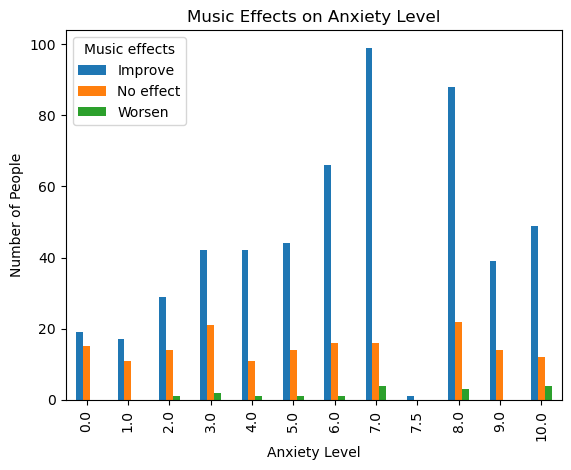

In [11]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="Anxiety Level", title="Music Effects on Anxiety Level") 


In [12]:
grouped_counts = cleaned_survey_df.groupby(["Depression", "Music effects"]).size().reset_index(name='count')
grouped_counts.head()

,Depression,Music effects,count
0,0.0,Improve,51
1,0.0,No effect,29
2,0.0,Worsen,1
3,1.0,Improve,33
4,1.0,No effect,7


In [13]:
pivot_table = grouped_counts.pivot_table(
    index='Depression',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
Depression                               
0.0               51.0       29.0     1.0
1.0               33.0        7.0     0.0
2.0               62.0       26.0     1.0
3.0               44.0       12.0     0.0
3.5                2.0        0.0     0.0
4.0               49.0        8.0     1.0
5.0               39.0       14.0     2.0
6.0               70.0       16.0     1.0
7.0               69.0       23.0     2.0
8.0               65.0       10.0     1.0
9.0               28.0        7.0     2.0
10.0              23.0       14.0     6.0


<Axes: title={'center': 'Music Effects on Depression Level'}, xlabel='Depression Level', ylabel='Number of People'>

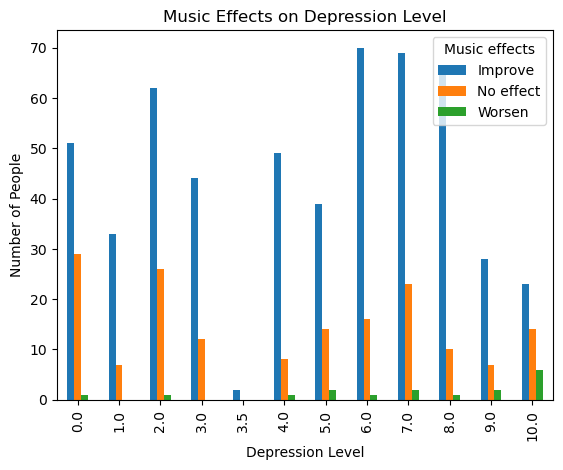

In [14]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="Depression Level", title="Music Effects on Depression Level") 

In [15]:
grouped_counts = cleaned_survey_df.groupby(["Insomnia", "Music effects"]).size().reset_index(name='count')
grouped_counts.head()

,Insomnia,Music effects,count
0,0.0,Improve,104
1,0.0,No effect,42
2,0.0,Worsen,2
3,1.0,Improve,63
4,1.0,No effect,16


In [16]:
pivot_table = grouped_counts.pivot_table(
    index='Insomnia',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
Insomnia                                 
0.0              104.0       42.0     2.0
1.0               63.0       16.0     1.0
2.0               62.0       21.0     1.0
3.0               50.0       14.0     3.0
3.5                1.0        0.0     0.0
4.0               43.0       13.0     2.0
5.0               48.0        6.0     1.0
6.0               44.0       14.0     2.0
7.0               44.0       13.0     2.0
8.0               37.0       10.0     2.0
9.0               20.0        5.0     0.0
10.0              19.0       12.0     1.0


<Axes: title={'center': 'Music Effects on Insomnia Level'}, xlabel='Insomnia Level', ylabel='Number of People'>

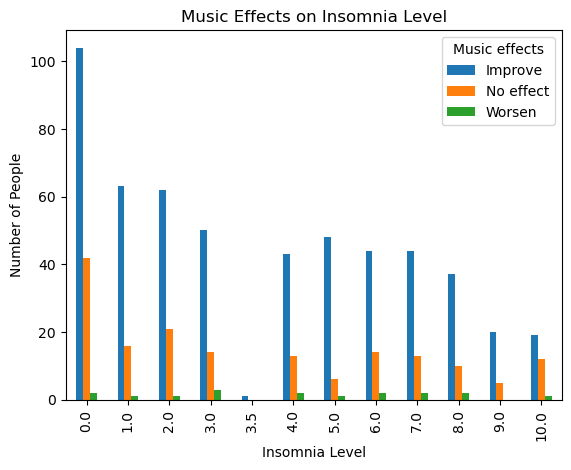

In [17]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="Insomnia Level", title="Music Effects on Insomnia Level") 

In [18]:
grouped_counts = cleaned_survey_df.groupby(["OCD", "Music effects"]).size().reset_index(name='count')
grouped_counts.head()

,OCD,Music effects,count
0,0.0,Improve,174
1,0.0,No effect,64
2,0.0,Worsen,4
3,1.0,Improve,65
4,1.0,No effect,25


In [19]:
pivot_table = grouped_counts.pivot_table(
    index='OCD',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
OCD                                      
0.0              174.0       64.0     4.0
1.0               65.0       25.0     3.0
2.0               71.0       20.0     2.0
3.0               50.0       11.0     2.0
4.0               38.0        9.0     1.0
5.0               44.0        7.0     1.0
5.5                1.0        0.0     0.0
6.0               26.0        6.0     1.0
7.0               17.0       12.0     1.0
8.0               22.0        5.0     1.0
8.5                1.0        0.0     0.0
9.0               13.0        1.0     0.0
10.0              13.0        6.0     1.0


<Axes: title={'center': 'Music Effects on OCD Level'}, xlabel='OCD Level', ylabel='Number of People'>

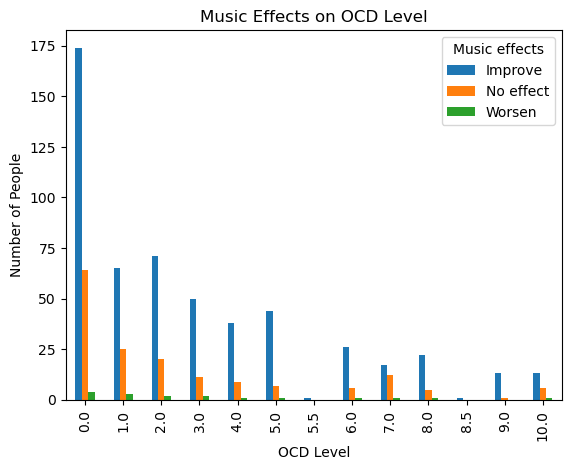

In [20]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="OCD Level", title="Music Effects on OCD Level") 
